In [1]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import matplotlib.pyplot as plt

In [17]:
plt.style.use('seaborn-bright')
plt.style.use('seaborn-whitegrid')

/var/folders/8c/bv99bkt927d5cb60c1q8n6b00000gp/T/ipykernel_3632/2680252145.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')
/var/folders/8c/bv99bkt927d5cb60c1q8n6b00000gp/T/ipykernel_3632/2680252145.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [8]:
# Randomly generate the scenarios
np.random.seed(66) 
vec1 = np.random.normal(10, 5, 15)+5
print(vec1)

[22.07807182  9.573568   11.91845982 11.21541912 16.73523865 22.78245552
  0.21825719 21.7954034  18.24173396 16.43014372 29.78457881 20.46354921
 20.85419192 22.17610103 14.0950954 ]


In [9]:
import numpy as np

def sample_from_simplex(dim):
    x = np.random.dirichlet(np.ones(dim))
    return x

# Example usage
num_samples = 15
dimension = 4
samples = np.zeros((num_samples, dimension))

for i in range(num_samples):
    samples[i] = sample_from_simplex(dimension)
print(samples)
scenario_array = samples * vec1[:, np.newaxis]


[[0.06392956 0.74824374 0.02485053 0.16297617]
 [0.30499462 0.2516113  0.21740796 0.22598612]
 [0.01035722 0.67839554 0.02322253 0.28802472]
 [0.79648717 0.06857119 0.12599941 0.00894223]
 [0.29214518 0.16811616 0.10869322 0.43104544]
 [0.46564055 0.00628981 0.50634594 0.0217237 ]
 [0.02210789 0.04947759 0.84340307 0.08501145]
 [0.0226578  0.50967167 0.17235452 0.29531601]
 [0.03547749 0.48527077 0.33799799 0.14125375]
 [0.36403649 0.09091158 0.43771788 0.10733405]
 [0.2713153  0.46853315 0.01117895 0.24897261]
 [0.17812936 0.32907495 0.32160333 0.17119236]
 [0.4571859  0.06140163 0.3272048  0.15420767]
 [0.20534967 0.23927262 0.10463209 0.45074561]
 [0.02404144 0.39625587 0.13828161 0.44142108]]


In [10]:
print(scenario_array)


[[1.41144147e+00 1.65197790e+01 5.48651729e-01 3.59819960e+00]
 [2.91988676e+00 2.40881789e+00 2.08136990e+00 2.16349346e+00]
 [1.23442066e-01 8.08542994e+00 2.76776742e-01 3.43281107e+00]
 [8.93293743e+00 7.69054607e-01 1.41313619e+00 1.00290890e-01]
 [4.88911931e+00 2.81346402e+00 1.81900694e+00 7.21364839e+00]
 [1.06084352e+01 1.43297323e-01 1.15358038e+01 4.94919249e-01]
 [4.82520539e-03 1.07988396e-02 1.84078783e-01 1.85543602e-02]
 [4.93835875e-01 1.11084997e+01 3.75653623e+00 6.43653155e+00]
 [6.47170871e-01 8.85218031e+00 6.16566938e+00 2.57671340e+00]
 [5.98117178e+00 1.49369040e+00 7.19176770e+00 1.76351383e+00]
 [8.08101190e+00 1.39550624e+01 3.32960208e-01 7.41554430e+00]
 [3.64515898e+00 6.73404141e+00 6.58114555e+00 3.50320327e+00]
 [9.53424245e+00 1.28048143e+00 6.82359166e+00 3.21587638e+00]
 [4.55385510e+00 5.30613388e+00 2.32033182e+00 9.99578022e+00]
 [3.38866363e-01 5.58526424e+00 1.94909251e+00 6.22187229e+00]]


In [11]:
np.set_printoptions(formatter={'float_kind': lambda x: "%.6f" % x})

# Print the result as code
print(np.array2string(scenario_array, separator=', ', prefix='[', suffix=']'))

[[1.411441, 16.519779, 0.548652, 3.598200],
  [2.919887, 2.408818, 2.081370, 2.163493],
  [0.123442, 8.085430, 0.276777, 3.432811],
  [8.932937, 0.769055, 1.413136, 0.100291],
  [4.889119, 2.813464, 1.819007, 7.213648],
  [10.608435, 0.143297, 11.535804, 0.494919],
  [0.004825, 0.010799, 0.184079, 0.018554],
  [0.493836, 11.108500, 3.756536, 6.436532],
  [0.647171, 8.852180, 6.165669, 2.576713],
  [5.981172, 1.493690, 7.191768, 1.763514],
  [8.081012, 13.955062, 0.332960, 7.415544],
  [3.645159, 6.734041, 6.581146, 3.503203],
  [9.534242, 1.280481, 6.823592, 3.215876],
  [4.553855, 5.306134, 2.320332, 9.995780],
  [0.338866, 5.585264, 1.949093, 6.221872]]


In [12]:
num_rows = len(scenario_array)
num_cols = len(scenario_array[0])

# Generate the LaTeX code
latex_code = "\\begin{tabular}{|" + "c|" * num_cols + "}\n"
latex_code += "\\hline\n"

for row in scenario_array:
    latex_code += " & ".join("{:.6f}".format(val) for val in row)
    latex_code += " \\\\\n"

latex_code += "\\hline\n"
latex_code += "\\end{tabular}"

# Print the LaTeX code
print(latex_code)

\begin{tabular}{|c|c|c|c|}
\hline
1.411441 & 16.519779 & 0.548652 & 3.598200 \\
2.919887 & 2.408818 & 2.081370 & 2.163493 \\
0.123442 & 8.085430 & 0.276777 & 3.432811 \\
8.932937 & 0.769055 & 1.413136 & 0.100291 \\
4.889119 & 2.813464 & 1.819007 & 7.213648 \\
10.608435 & 0.143297 & 11.535804 & 0.494919 \\
0.004825 & 0.010799 & 0.184079 & 0.018554 \\
0.493836 & 11.108500 & 3.756536 & 6.436532 \\
0.647171 & 8.852180 & 6.165669 & 2.576713 \\
5.981172 & 1.493690 & 7.191768 & 1.763514 \\
8.081012 & 13.955062 & 0.332960 & 7.415544 \\
3.645159 & 6.734041 & 6.581146 & 3.503203 \\
9.534242 & 1.280481 & 6.823592 & 3.215876 \\
4.553855 & 5.306134 & 2.320332 & 9.995780 \\
0.338866 & 5.585264 & 1.949093 & 6.221872 \\
\hline
\end{tabular}


In [13]:
def read_data(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            if method == 'entropy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                name = dir + '/'+method+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'cvxpy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
            # elif method =='forest0':
                # name = dir + '/forest'+ name_tail
                # data = pd.read_csv(name)['forest'].values
                # data = np.sort(data)
                # data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

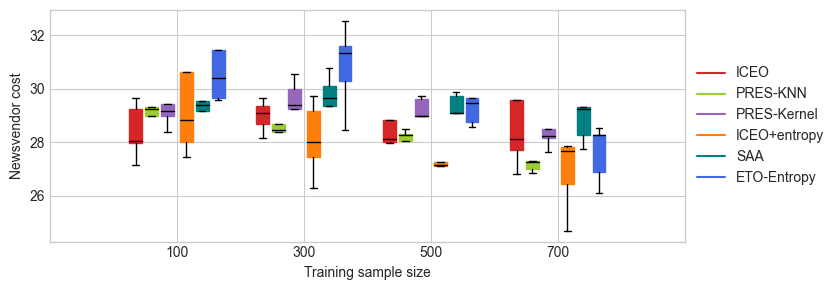

In [14]:

#K=10
# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-09_00-58-08'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

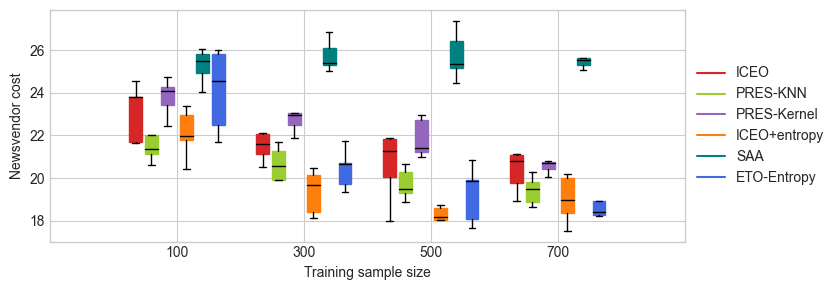

In [15]:
#K=15

# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-10_00-20-52'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

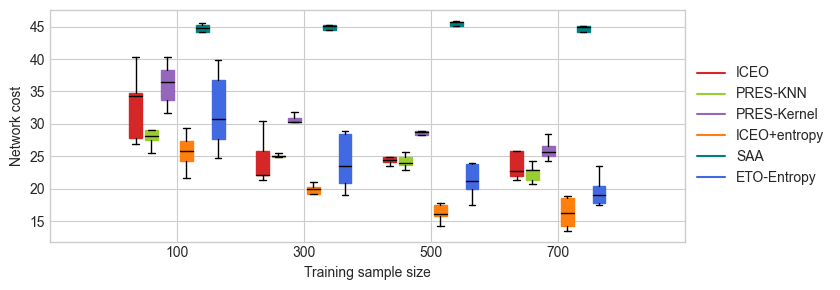

In [16]:
#K=5


# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-10_15-16-59'
iceo = read_data(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation)
saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

N= 500, K=5
dim_feature = [5, 15, 30]

In [17]:
def read_data_x(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None, x_dim=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            if method == 'entropy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                name = dir + '/'+method+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'cvxpy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
            # elif method =='forest0':
                # name = dir + '/forest'+ name_tail
                # data = pd.read_csv(name)['forest'].values
                # data = np.sort(data)
                # data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

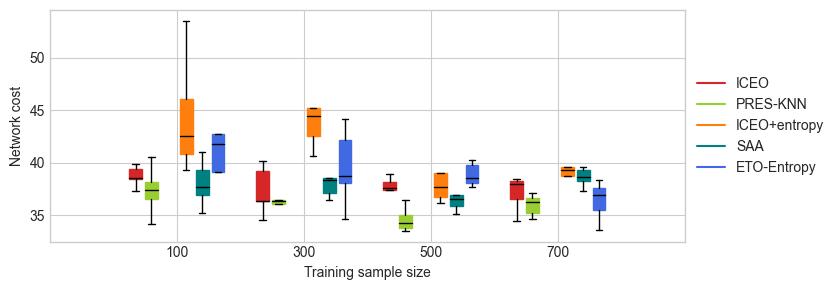

In [18]:
#K=5
# x_dim = 30


# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-10_17-31-26'
x_dim = 30
iceo = read_data_x(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_dim = x_dim)
#print(iceo)
entropy = read_data_x(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_dim = x_dim)
iceo_entropy = read_data_x(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_dim = x_dim)
saa = read_data_x(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_dim = x_dim)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_x(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_dim = x_dim)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

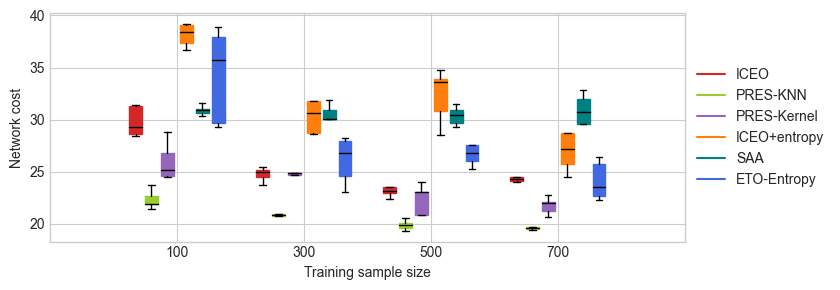

In [19]:
#increase x-range to 50
#K=5
# x_dim = 5


# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-10_22-16-37'
x_dim = 5
iceo = read_data_x(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_dim = x_dim)
#print(iceo)
entropy = read_data_x(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_dim = x_dim)
iceo_entropy = read_data_x(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_dim = x_dim)
saa = read_data_x(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_dim = x_dim)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_x(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_dim = x_dim)
kernel = read_data_x(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_dim = x_dim)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

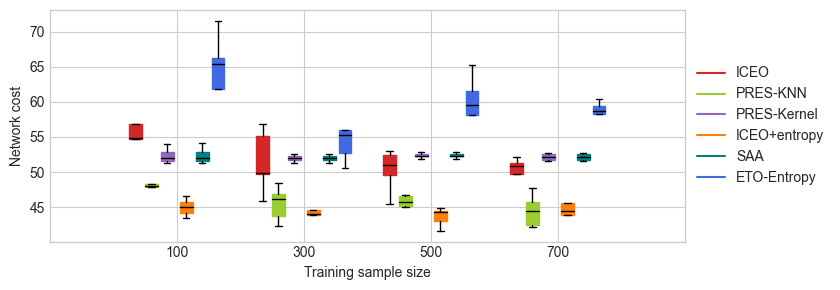

In [20]:
#increase x-range to 0.5
#K=5
# x_dim = 6


# plot 
n_grid = [ 100, 300, 500, 700] #
deg_grid = [1]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-10_23-10-42'
x_dim = 6
iceo = read_data_x(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_dim = x_dim)
#print(iceo)
entropy = read_data_x(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_dim = x_dim)
iceo_entropy = read_data_x(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_dim = x_dim)
saa = read_data_x(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_dim = x_dim)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_x(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_dim = x_dim)
kernel = read_data_x(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_dim = x_dim)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

In [34]:
def read_data_xgrid(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None, x_grid = None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            for x_dim in x_grid:
                name_tail = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'.csv'
                name_tail_false = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
                name_tail_true = '_'+data_generation+'x_dim' + str(x_dim)+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
                if method == 'entropy':
                    name = dir + '/'+method+ name_tail
                    data = pd.read_csv(name)['test_loss'].values
                    data = np.sort(data)
                    data_list.append(data)
                elif method == 'iceo' :
                    name = dir + '/'+method+ name_tail_false
                    data = pd.read_csv(name)['test_loss'].values
                    data = np.sort(data)
                    data_list.append(data)

                elif method == 'iceo+entropy' :
                    method_name = 'iceo'
                    name = dir + '/'+method_name+ name_tail_true
                    data = pd.read_csv(name)['test_loss'].values
                    data = np.sort(data)
                    data_list.append(data)

                elif method == 'cvxpy':
                    name = dir + '/'+method+ name_tail
                    data = pd.read_csv(name)[method].values
                    data = np.sort(data)
                    data_list.append(data)
                # elif method =='forest0':
                    # name = dir + '/forest'+ name_tail
                    # data = pd.read_csv(name)['forest'].values
                    # data = np.sort(data)
                    # data_list.append(data)
                else:
                    # name = dir + '/baseline'+ name_tail
                    name = dir + '/forest'+ name_tail
                    data = pd.read_csv(name)[method].values
                    data = np.sort(data)
                    data_list.append(data)
    return data_list

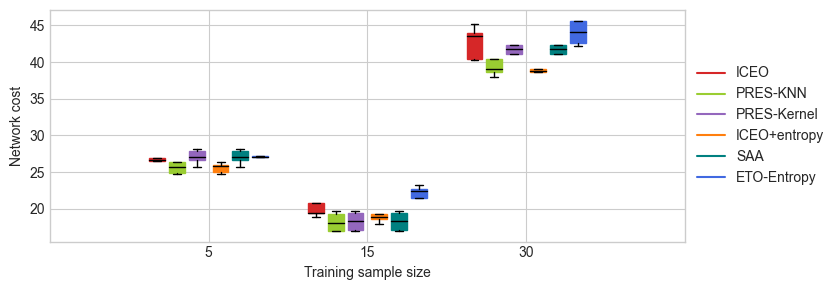

In [22]:

# plot 
# K=5
n_grid = [  500] #
deg_grid = [1]
x_grid = [5, 15, 30]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-11_17-04-01'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = x_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

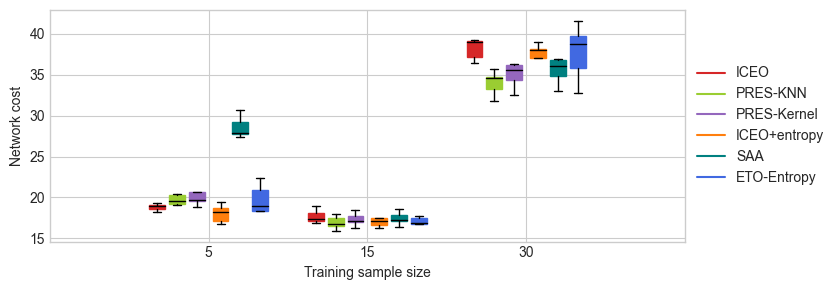

In [23]:
# K=15


# plot 
n_grid = [  500] #
deg_grid = [1]
x_grid = [5, 15, 30]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-11_22-43-22'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = x_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

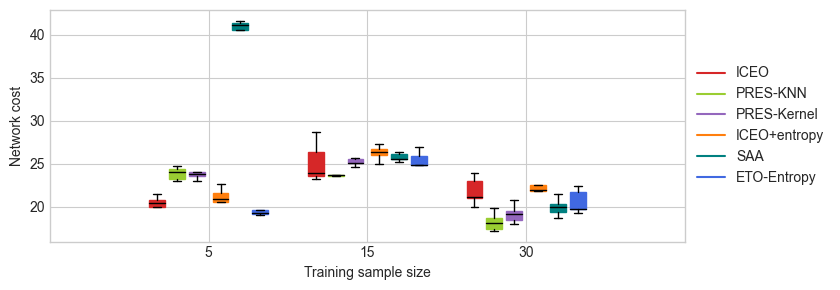

In [24]:
# K=15

# plot 
n_grid = [  500] #
deg_grid = [1]
x_grid = [5, 15, 30]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-12_00-08-52'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = x_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

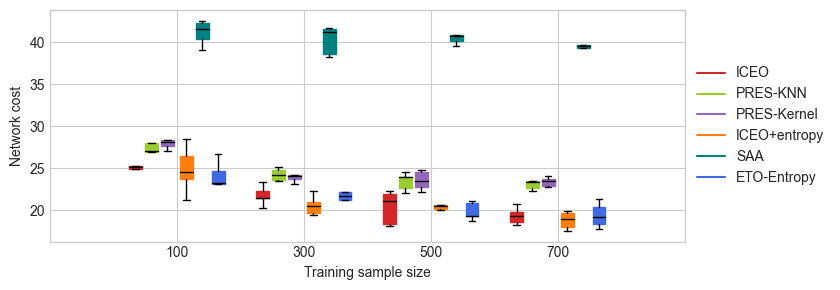

In [25]:
# K=15

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-12_11-47-34'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

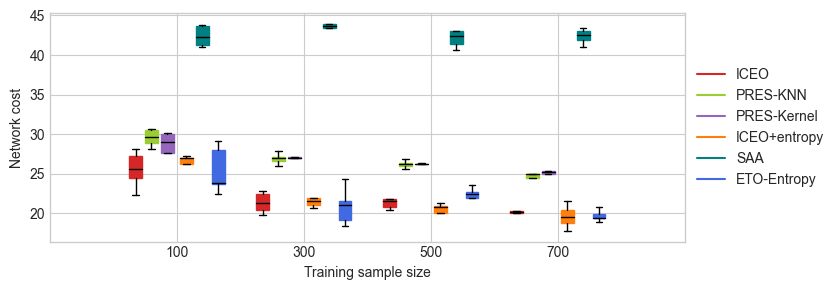

In [26]:
# samething but K=10


# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-12_16-25-23'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

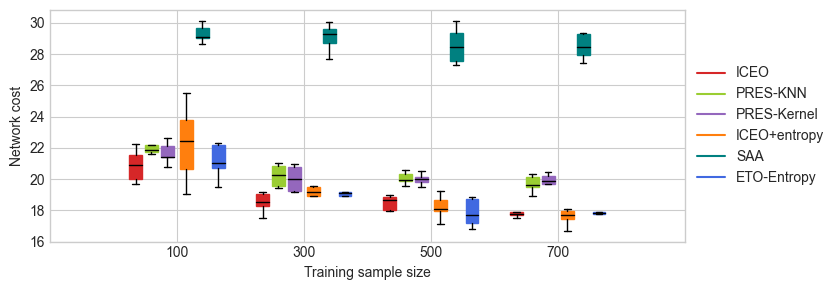

In [27]:
# samething but K=5


# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-12_23-54-50'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

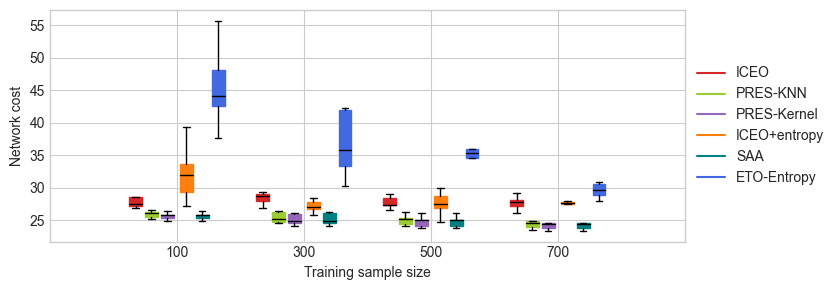

In [28]:
# model mis-specification
# multi generation
# linear prediction
# 0.5 entropy regularization


# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='multi_layer'
dir = 'iceo_results/2023-06-13_00-24-34'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

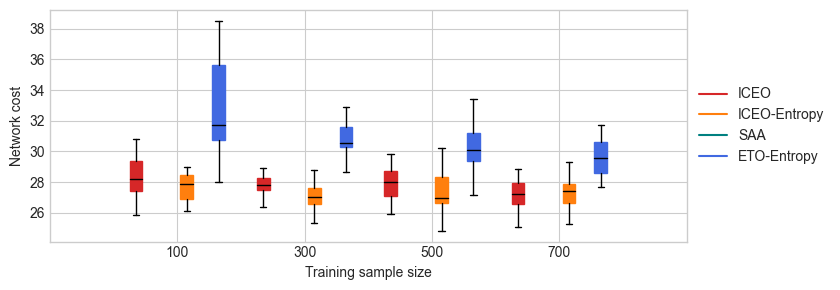

In [29]:
# 25 simulations
# model mis-specification
# multi generation
# linear prediction
# 0.5 entropy regularization


# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='multi_layer'
dir = 'iceo_results/2023-06-13_19-56-57'
x_dim = 6
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-misspecification.pdf')

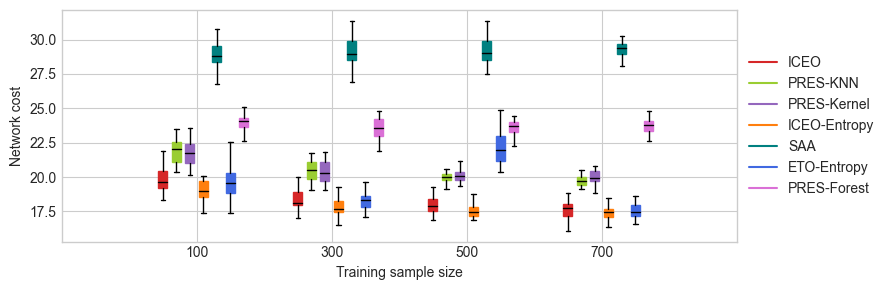

In [66]:
# well-specification K=5
# 1 entropy regularization
# 25 simulations

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-14_00-33-29'
dir2 = 'iceo_results/forest-dim5-2024-07-21_13-42-03/'
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
forest = read_data_xgrid(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation, x_grid = x_grid)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)

import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp7 = plt.boxplot(forest, positions=np.array(range(len(iceo)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )

#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
set_box_color(bp7, 'orchid')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-iid-K5.pdf')

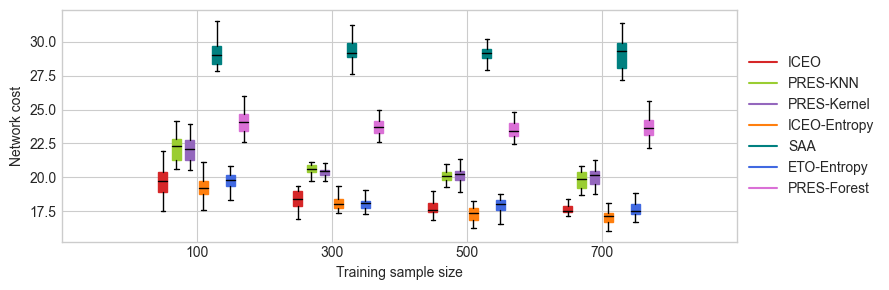

In [52]:
# well-specification K=10
# 1 entropy regularization
# 25 simulations

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-14_13-15-03'
dir2 = 'iceo_results/forest-dim10-2024-06-05_14-45-29/'
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
forest = read_data_xgrid(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation, x_grid = x_grid)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp7 = plt.boxplot(forest, positions=np.array(range(len(iceo)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
set_box_color(bp7, 'orchid')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-iid-K10.pdf')

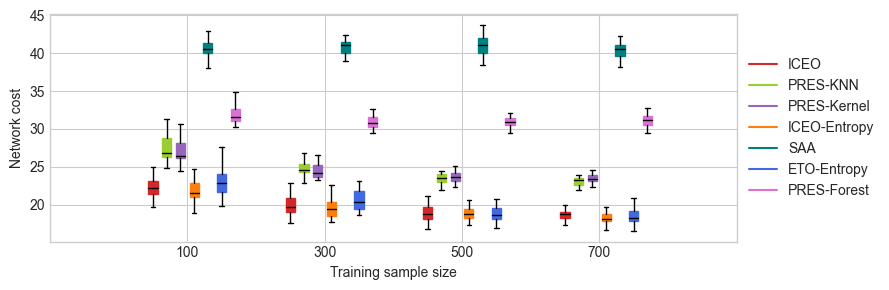

In [51]:
# well-specification K=15
# 1 entropy regularization
# 25 simulations

# plot 
n_grid = [100, 300,  500, 700] #
deg_grid = [1]
x_grid = [5]
data_generation ='two_layer'
dir = 'iceo_results/2023-06-14_13-54-38'
dir2 = 'iceo_results/forest-dim15-2024-07-20_21-19-45/'
iceo = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo', data_generation=data_generation, x_grid = x_grid)
#print(iceo)
entropy = read_data_xgrid(n_grid, deg_grid, dir, method ='entropy',data_generation=data_generation, x_grid = x_grid)
iceo_entropy = read_data_xgrid(n_grid, deg_grid, dir, method = 'iceo+entropy',data_generation=data_generation, x_grid = x_grid)
saa = read_data_xgrid(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation,x_grid = x_grid)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
knn = read_data_xgrid(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation, x_grid = x_grid)
kernel = read_data_xgrid(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation, x_grid = x_grid)
forest = read_data_xgrid(n_grid, deg_grid, dir2, method = 'forest',data_generation=data_generation,x_grid = x_grid)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = n_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (9,3))
wd = 0.4
a = 6.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-1.5, sym='', widths=wd,  patch_artist = True, vert=True )
bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.9, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+1.5, sym='', widths=wd, patch_artist = True, vert=True )
bp7 = plt.boxplot(forest, positions=np.array(range(len(iceo)))*a+2.1, sym='', widths=wd, patch_artist = True, vert=True )
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
set_box_color(bp4, 'yellowgreen')
set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')
set_box_color(bp7, 'orchid')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO-Entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
plt.plot([], c='orchid', label='PRES-Forest')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Network cost")
plt.tight_layout()
plt.savefig('nf-iid-K15.pdf')

In [5]:
def read_data2(n_grid=None, deg_grid = None, dir=None, method = None, data_generation=None):
    data_list = []

    for n in n_grid:
        for deg in deg_grid:
            name_tail = data_generation+'-'+'degx_dim5ntrain'+str(n)+'deg'+str(deg)+'.csv'
            name_tail_false = data_generation+'-'+'degx_dim5ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+ '.csv'
            name_tail_true = data_generation+'-'+'degx_dim5ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(True)+ '.csv'
            # name_tail_reg = '_'+data_generation+'ntrain'+str(n)+'deg'+str(deg)+'entropy'+ str(False)+'reg'+str(True)+'.csv'
            if method == 'entropy':
                method_name = 'entropy_model '
                name = dir + '/'+method_name+ name_tail
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo' :
                method_name = 'iceo_model '
                name = dir + '/'+method_name+ name_tail_false
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)

            elif method == 'iceo+entropy' :
                method_name = 'iceo_model '
                name = dir + '/'+method_name+ name_tail_true
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)
            elif method == 'iceo+reg' :
                method_name = 'iceo'
                name = dir + '/'+method_name+ name_tail_reg
                data = pd.read_csv(name)['test_loss'].values
                data = np.sort(data)
                data_list.append(data)


            elif method == 'cvxpy':
                name = dir + '/'+method+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
            elif method =='forest0':
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)['forest'].values
                data = np.sort(data)
                data_list.append(data)
            else:
                # name = dir + '/baseline'+ name_tail
                name = dir + '/forest'+ name_tail
                data = pd.read_csv(name)[method].values
                data = np.sort(data)
                data_list.append(data)
    return data_list

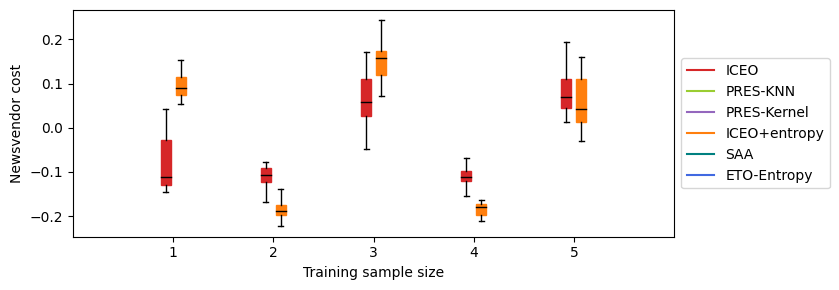

In [9]:
# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3,4,5]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-22_22-51-29'
entropy_dir = 'iceo_results/2024-08-22_22-21-55'
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (8.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot([(a - b)/b for a, b in zip(iceo, entropy)], positions=np.array(range(len(iceo)))*a-0.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot([(a - b)/b for a, b in zip(iceo_entropy, entropy)], positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp2 = plt.boxplot([(a - b)/b for a, b in zip(entropy, entropy)], positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#
set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
plt.plot([], c='yellowgreen', label='PRES-KNN')
plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Training sample size")
plt.ylabel("Newsvendor cost")
plt.tight_layout()
# plt.savefig('iid_plot-informs-version-full.pdf')

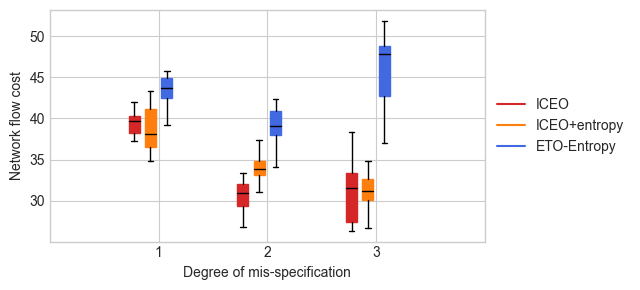

In [26]:
# changed to abs, 0.2


# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-23_02-04-23'
entropy_dir = 'iceo_results/2024-08-23_01-31-41'
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (6.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot(iceo, positions=np.array(range(len(iceo)))*a-0.9, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot(iceo_entropy, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
bp2 = plt.boxplot(entropy, positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#

set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
# plt.plot([], c='teal', label='SAA')
plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Degree of mis-specification")
plt.ylabel("Network flow cost")
plt.tight_layout()
plt.savefig('Network-mismatch.pdf')

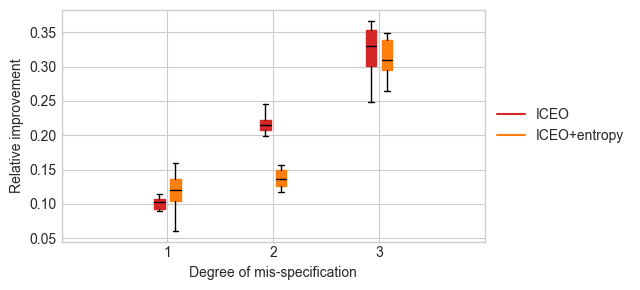

In [25]:
# changed to abs, 0.2


# a plot about two generation linear prediction small 
# model mis-specification linear prediction two layer generation

# remove ICEO objective regularization

# two layer generation #linear prediction
# increase # of scenarios to 10
# no entropy initialization

# plot 
n_grid = [100] #
deg_grid = [1,2,3]
data_generation ='mis-specification'
iceo_dir = 'iceo_results/2024-08-23_02-04-23'
entropy_dir = 'iceo_results/2024-08-23_01-31-41'
iceo = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo', data_generation=data_generation)
#print(iceo)
entropy = read_data2(n_grid, deg_grid, entropy_dir, method ='entropy',data_generation=data_generation)
iceo_entropy = read_data2(n_grid, deg_grid, iceo_dir, method = 'iceo+entropy',data_generation=data_generation)
# saa = read_data(n_grid, deg_grid, dir, method = 'saa',data_generation=data_generation)
#cvxpy = read_data(n_grid, deg_grid, dir, method = 'cvxpy',data_generation=data_generation)
# knn = read_data(n_grid, deg_grid, dir, method = 'knn',data_generation=data_generation)
# kernel = read_data(n_grid, deg_grid, dir, method = 'kernel',data_generation=data_generation)
# forest = read_data(n_grid, deg_grid, dir, method = 'forest0',data_generation=data_generation)
np.set_printoptions(precision=2)
# iceo = np.array(iceo)
# print(iceo)


import numpy as np
ticks = deg_grid

def set_box_color(bp, color):
    # for patch in bp['boxes']:
    #     patch.set_facecolor(color)
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['caps'], color='black')
    plt.setp(bp['medians'], color='black')

plt.figure(figsize = (6.5,3))
wd = 0.4
a = 4.0

bp1 = plt.boxplot([(b-a)/b for a, b in zip(iceo, entropy)], positions=np.array(range(len(iceo)))*a-0.3, sym='', widths=wd,  patch_artist = True, vert=True )
# bp4 = plt.boxplot(knn, positions=np.array(range(len(ticks)))*a-0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp5 = plt.boxplot(kernel, positions=np.array(range(len(ticks)))*a-0.3, sym='', widths=wd, patch_artist = True, vert=True )
bp6 = plt.boxplot([(b-a)/b for a, b in zip(iceo_entropy, entropy)], positions=np.array(range(len(ticks)))*a+0.3, sym='', widths=wd, patch_artist = True, vert=True )
# bp3 = plt.boxplot(saa, positions=np.array(range(len(ticks)))*a+0.8, sym='', widths=wd, patch_artist = True, vert=True )
# bp2 = plt.boxplot([(a - b)/b for a, b in zip(entropy, entropy)], positions=np.array(range(len(ticks)))*a+1.3, sym='', widths=wd, patch_artist = True, vert=True )
#bp7 = plt.boxplot(cvxpy, positions=np.array(range(len(iceo)))*2.0+0.6, sym='', widths=0.2)
# set_box_color(bp1, '#D7191C') # colors are from http://colorbrewer2.org/
# set_box_color(bp2, '#2C7BB6')
# set_box_color(bp3, '#FA8072')
# set_box_color(bp4, '#008000')
# set_box_color(bp5, '#FFD700')
# set_box_color(bp6, '#FF81C0')
# #set_box_color(bp7, '#929591')
# color = 'royalblue'
# colors = [color, color, color, color]
# for patch, color in zip(bp4['boxes'], colors):
#     patch.set_facecolor(color)
#
set_box_color(bp1, 'tab:red')
# set_box_color(bp4, 'yellowgreen')
# set_box_color(bp5, 'tab:purple')
set_box_color(bp6, 'tab:orange')
# set_box_color(bp3, 'teal')
set_box_color(bp2, 'royalblue')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='tab:red', label='ICEO')
# plt.plot([], c='yellowgreen', label='PRES-KNN')
# plt.plot([], c='tab:purple', label='PRES-Kernel')
plt.plot([], c='tab:orange', label='ICEO+entropy')
# plt.plot([], c='teal', label='SAA')
# plt.plot([], c='royalblue', label='ETO-Entropy')
#plt.plot([], c='#929591', label='Opt-net')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(0, len(ticks)*int(a), int(a)), ticks)
plt.xlim(-a, len(ticks)*a)
#plt.ylim(160, 400)
#plt.yscale('log')
plt.xlabel("Degree of mis-specification")
plt.ylabel("Relative improvement")
plt.tight_layout()
plt.savefig('network-mismatch-relative.pdf')